In [1]:
!pip install phpserialize

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [2]:
import pandas as pd
import phpserialize
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from scipy.interpolate import make_interp_spline, BSpline
import numpy as  np
import re
%matplotlib inline

In [3]:
group = "M"

In [4]:
data_full = pd.read_csv("diff_delivery_region.csv",sep=";", header = None, names=['date','order','fact_delivery','site_delivery','1c_delivery','basket','full','is_moscow'])

/usr/local/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_full['date'] =  pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

In [6]:
data=data_full[data_full['is_moscow'] == 0]

In [7]:
data_moscow = data_full[data_full['is_moscow'] == 1]

In [8]:
c_delivery = data[data['1c_delivery'].notnull()]
f_delivery = data[data['full'].notnull()]

In [9]:
f_delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74535 entries, 1 to 90981
Data columns (total 8 columns):
date             74535 non-null datetime64[ns]
order            74535 non-null int64
fact_delivery    74535 non-null float64
site_delivery    70503 non-null object
1c_delivery      14672 non-null object
basket           74535 non-null int64
full             74535 non-null float64
is_moscow        74535 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 5.1+ MB


In [10]:
data = data[pd.to_numeric(data['site_delivery'], errors='coerce').notnull()]
# data = data[pd.to_numeric(data['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['fact_delivery'], errors='coerce').notnull()]
f_delivery = f_delivery[pd.to_numeric(f_delivery['fact_delivery'], errors='coerce').notnull()]
c_delivery = c_delivery[pd.to_numeric(c_delivery['1c_delivery'], errors='coerce').notnull()]

In [11]:
data['site_delivery'] = data['site_delivery'].astype(float)

In [12]:
data['fact_delivery'] = data['fact_delivery'].astype(float)

In [13]:
c_delivery['fact_delivery'] = c_delivery['fact_delivery'].astype(float)
c_delivery['1c_delivery'] = c_delivery['1c_delivery'].astype(float)
f_delivery['fact_delivery'] = f_delivery['fact_delivery'].astype(float)

In [14]:
c_delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14693 entries, 70 to 90976
Data columns (total 8 columns):
date             14693 non-null datetime64[ns]
order            14693 non-null int64
fact_delivery    14693 non-null float64
site_delivery    10653 non-null object
1c_delivery      14693 non-null float64
basket           14693 non-null int64
full             14672 non-null float64
is_moscow        14693 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.0+ MB


In [15]:
data['diff'] = data['site_delivery'] - data['fact_delivery']
c_delivery['diff'] = c_delivery['1c_delivery'] - c_delivery['fact_delivery']
f_delivery['diff'] = f_delivery['full'] - f_delivery['fact_delivery']


In [16]:
data_group = data.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [17]:
data_group_c = c_delivery.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [18]:
data_group_f = f_delivery.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

In [19]:
result = data_group.mean()
result_c = data_group_c.mean()
result_f = data_group_f.mean()

In [20]:
result.head(5)

,fact_delivery,site_delivery,basket,full,is_moscow,diff
date,,,,,,
2016-06-30,643.186282,261.696622,34.561486,232.385135,0.0,-381.489661
2016-07-31,725.675875,273.016706,49.863962,244.060859,0.0,-452.659168
2016-08-31,689.860294,299.621512,43.232369,263.467275,0.0,-390.238782
2016-09-30,684.930459,263.991438,27.812979,224.748085,0.0,-420.939021
2016-10-31,680.138353,259.865251,1091.858329,220.490540,0.0,-420.273101


In [21]:
result_c.head(5)

,fact_delivery,1c_delivery,basket,full,is_moscow,diff
date,,,,,,
2016-06-30,681.324444,92.777778,0.000000,92.777778,0.0,-588.546667
2016-07-31,699.315385,82.538462,0.000000,92.076923,0.0,-616.776923
2016-08-31,522.586471,90.764706,0.000000,64.294118,0.0,-431.821765
2016-09-30,738.400625,74.437500,0.000000,38.066667,0.0,-663.963125
2016-10-31,737.028889,210.277778,9407.888889,132.000000,0.0,-526.751111


In [22]:
# xnew = np.linspace(result['cart_sum'].min(),result['cart_sum'].max(),300)

In [23]:
# spl = make_interp_spline(result['cart_sum'].values, result.index.values, k=5) #BSpline object

In [24]:
# power_smooth = spl(result.index.values)

<BarContainer object of 31 artists>

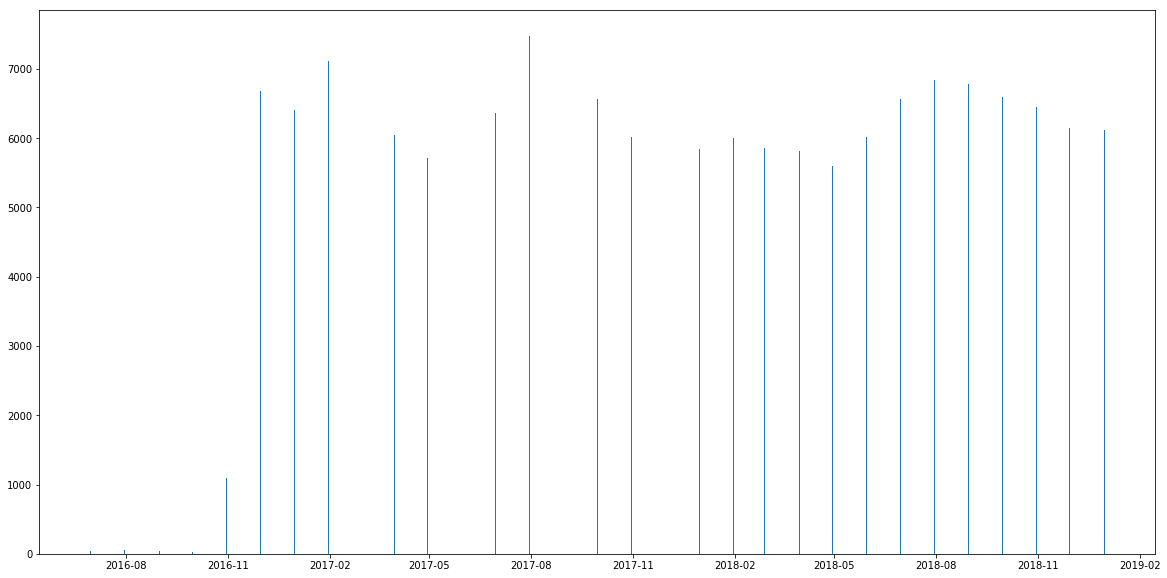

In [25]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.bar(result.index.values, result['basket'])

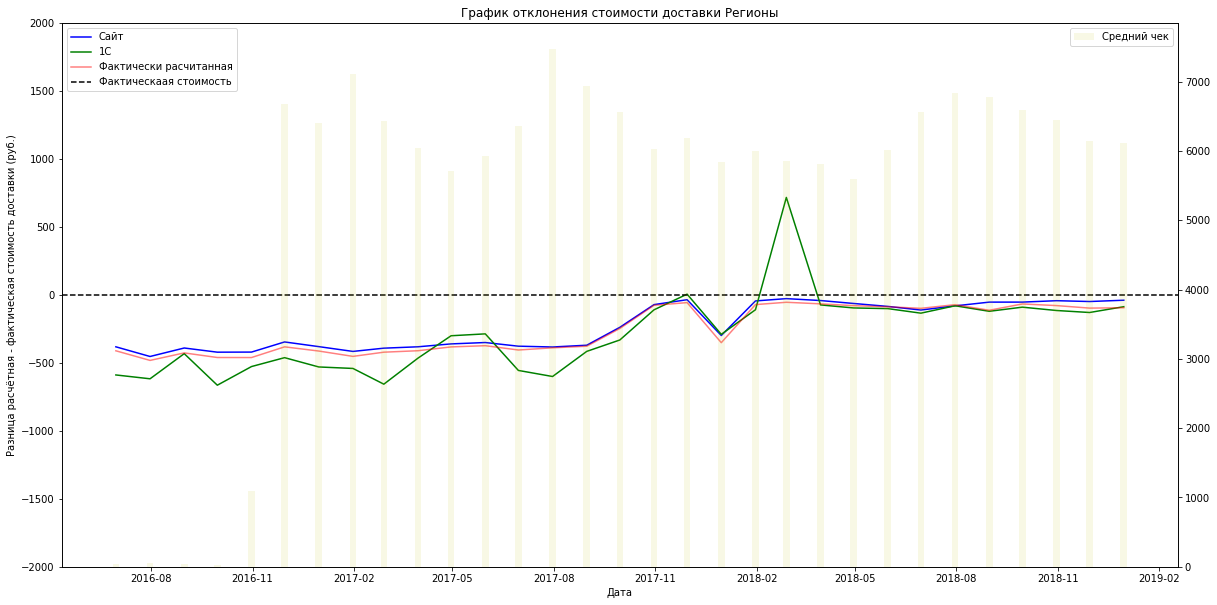

In [26]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"График отклонения стоимости доставки Регионы")
ax2 = ax1.twinx()
ax1.set_ylim([-2000,2000])
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Разница расчётная - фактическая стоимость доставки (руб.)")
ax1.plot(result['diff'],"-b", label=u'Сайт')
ax1.plot(result_c['diff'],"-g", label=u'1С')
ax1.plot(result_f['diff'],"-r", label=u'Фактически расчитанная', alpha=0.5)
ax2.bar(result.index.values, result['basket'], color="y", width=6, alpha=0.1, label=u"Средний чек")
ax1.axhline(0, color='k', linestyle='--', label=u"Фактическаая стоимость")
# ax1.plot(new_date_median['item_cost'],"-g", label=u'Стоиомсть позиции', antialiased=True)
# ax1.plot(new_date_mean['item_cost'],"-k", label=u'Стоиомсть позиции среднее', antialiased=True)
# ax1.plot(result['non_reg'],linewidth=2)
ax2.legend(loc=1)
ax1.legend(loc=2)

In [27]:
c_delivery_m = data_moscow[data_moscow['1c_delivery'].notnull()]
f_delivery_m = data_moscow[data_moscow['full'].notnull()]

data_moscow = data_moscow[pd.to_numeric(data_moscow['site_delivery'], errors='coerce').notnull()]
# data = data[pd.to_numeric(data['fact_delivery'], errors='coerce').notnull()]
c_delivery_m = c_delivery_m[pd.to_numeric(c_delivery_m['fact_delivery'], errors='coerce').notnull()]
f_delivery_m = f_delivery_m[pd.to_numeric(f_delivery_m['fact_delivery'], errors='coerce').notnull()]
c_delivery_m = c_delivery_m[pd.to_numeric(c_delivery_m['1c_delivery'], errors='coerce').notnull()]

data_moscow['site_delivery'] = data_moscow['site_delivery'].astype(float)
data_moscow['fact_delivery'] = data_moscow['fact_delivery'].astype(float)

c_delivery_m['fact_delivery'] = c_delivery_m['fact_delivery'].astype(float)
c_delivery_m['1c_delivery'] = c_delivery_m['1c_delivery'].astype(float)
f_delivery_m['fact_delivery'] = f_delivery_m['fact_delivery'].astype(float)

data_moscow['diff'] = data_moscow['site_delivery'] - data_moscow['fact_delivery']
c_delivery_m['diff'] = c_delivery_m['1c_delivery'] - c_delivery_m['fact_delivery']
f_delivery_m['diff'] = f_delivery_m['full'] - f_delivery_m['fact_delivery']

data_group_m = data_moscow.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))
data_group_c_m = c_delivery_m.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))
data_group_f_m = f_delivery_m.drop(columns=['order'], axis=1).groupby(pd.Grouper(key='date', freq=group))

result_m = data_group_m.mean()
result_c_m = data_group_c_m.mean()
result_f_m = data_group_f_m.mean()

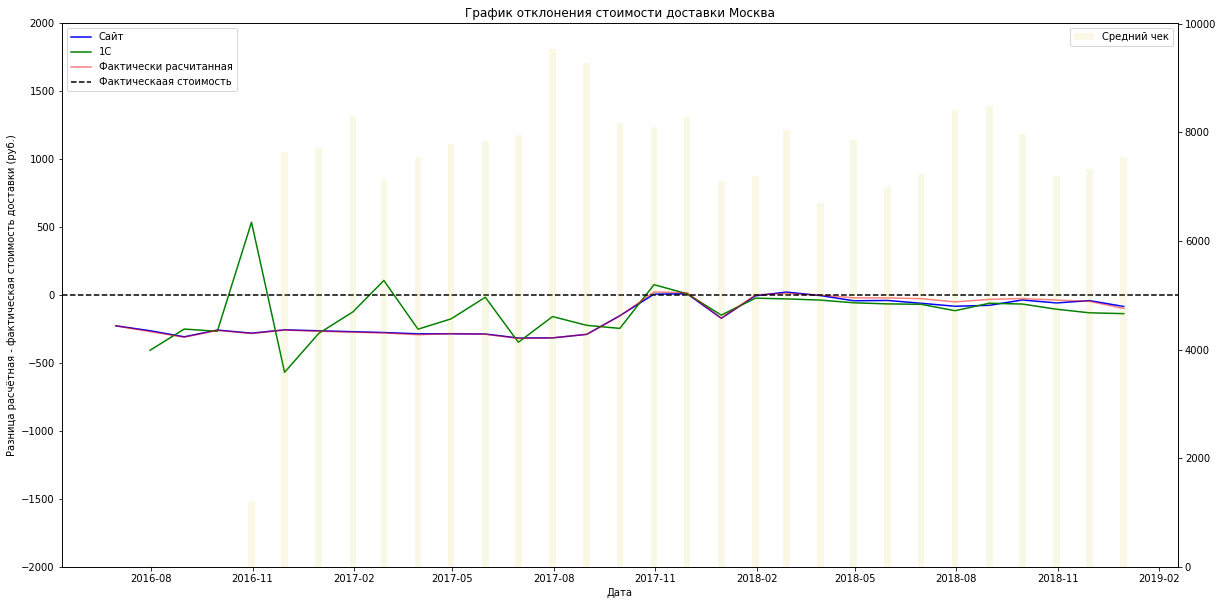

In [28]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"График отклонения стоимости доставки Москва")
ax2 = ax1.twinx()
ax1.set_ylim([-2000,2000])
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Разница расчётная - фактическая стоимость доставки (руб.)")
ax1.plot(result_m['diff'],"-b", label=u'Сайт')
ax1.plot(result_c_m['diff'],"-g", label=u'1С')
ax1.plot(result_f_m['diff'],"-r", label=u'Фактически расчитанная', alpha=0.5)
ax2.bar(result.index.values, result_m['basket'], color="y", width=6, alpha=0.1, label=u"Средний чек")
ax1.axhline(0, color='k', linestyle='--', label=u"Фактическаая стоимость")
# ax1.plot(new_date_median['item_cost'],"-g", label=u'Стоиомсть позиции', antialiased=True)
# ax1.plot(new_date_mean['item_cost'],"-k", label=u'Стоиомсть позиции среднее', antialiased=True)
# ax1.plot(result['non_reg'],linewidth=2)
ax2.legend(loc=1)
ax1.legend(loc=2)

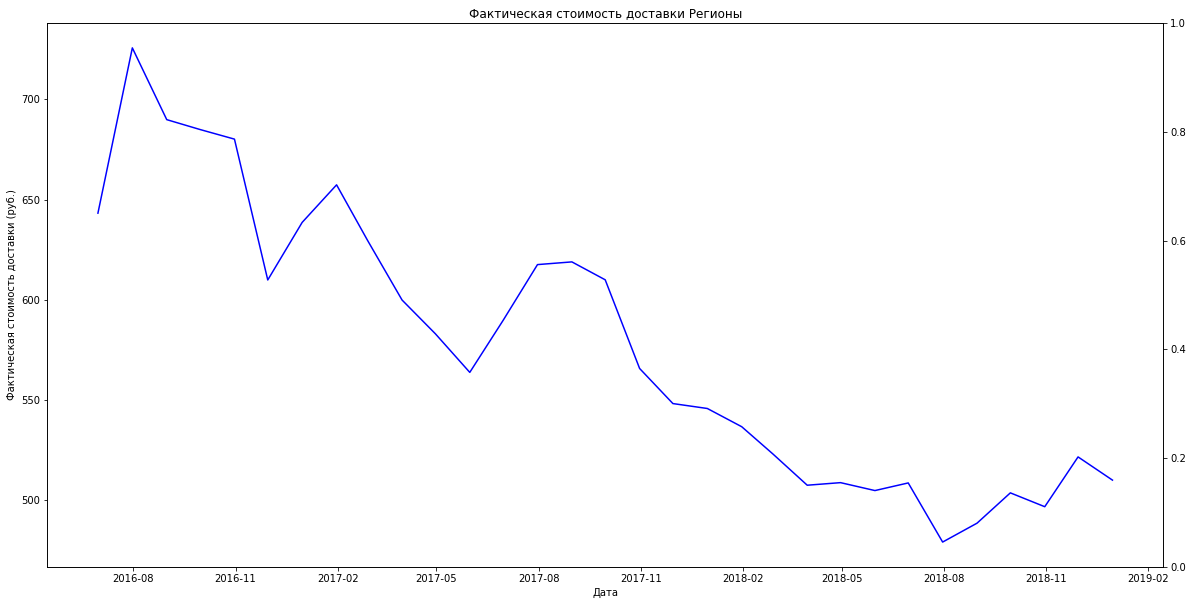

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"Фактическая стоимость доставки Регионы")
ax2 = ax1.twinx()
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Фактическая стоимость доставки (руб.)")
ax1.plot(result['fact_delivery'],"-b")


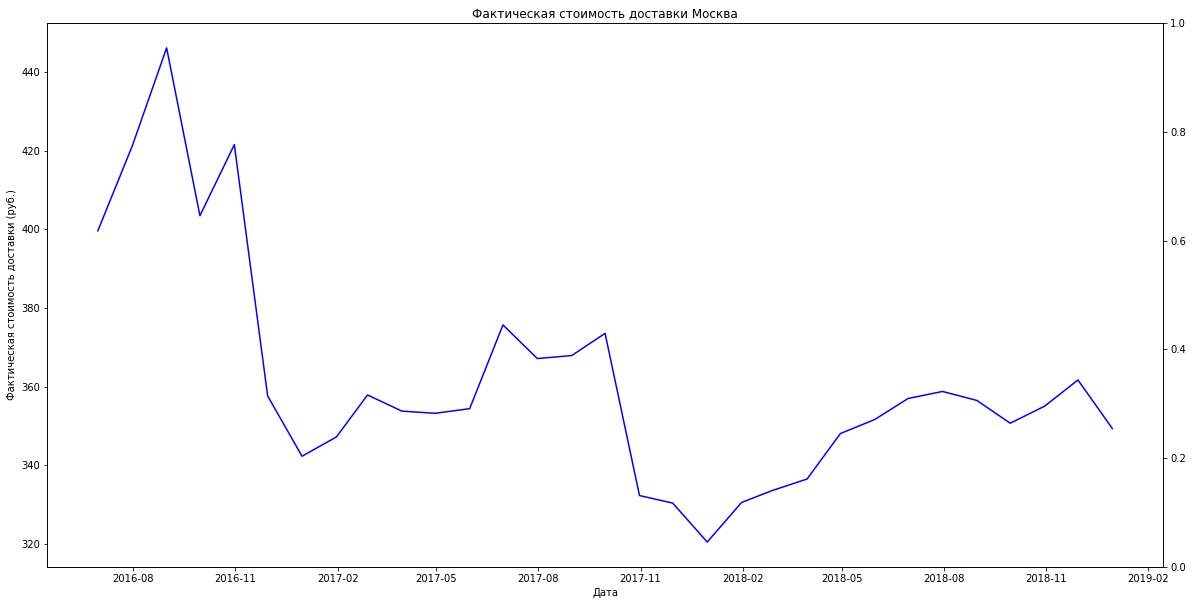

In [30]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title(u"Фактическая стоимость доставки Москва")
ax2 = ax1.twinx()
ax1.set_xlabel(u"Дата")
ax1.set_ylabel(u"Фактическая стоимость доставки (руб.)")
ax1.plot(result_m['fact_delivery'],"-b")